In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/cleanedData.csv')

In [90]:
df.shape

(55354, 68)

In [91]:
df.head()

,psyte_PSYTECategoryCode,psyte_PSYTEGroupCode,psyte_censusBlock,psyte_censusBlockGroup,psyte_censusBlockPopulation,psyte_censusBlockHouseholds,psyte_PSYTESegmentCode.description,psyte_householdIncomeVariable.value,psyte_householdIncomeVariable.description,psyte_propertyValueVariable.value,...,BathroomCount,SaleAmount,ParcelID,ParcelArea,Elevation,Geometry,BuildingID,MaxElevation,MinElevation,BuildingArea
0,4.0,10,1.200500e+14,1.200500e+11,98.0,43.0,Rustic Blue Collar,AAV,Top 30-50% of households by household income,B30,...,2.0,190000.0,C000CU7NQDWH,10043.0,22.0,"{""type"":""MultiPolygon"",""coordinates"":[[[[-85.5...",B000CTQ7NH6K,22.0,21.0,767.0
1,6.0,7,1.200500e+14,1.200500e+11,292.0,106.0,Middle Class Commuter Families,AAV,Top 30-50% of households by household income,AAV,...,2.0,190000.0,C000CU68TC6Y,133866.0,35.0,"{""type"":""MultiPolygon"",""coordinates"":[[[[-85.5...",B000CTQ7ODGR,38.0,38.0,746.0
2,7.0,8,1.200500e+14,1.200500e+11,62.0,17.0,Rural Family Values,AAV,Top 30-50% of households by household income,B30,...,1.0,15900.0,C000CU5U8R2A,48606.0,58.0,"{""type"":""MultiPolygon"",""coordinates"":[[[[-85.5...",B000CTQ7LAHQ,60.0,59.0,3645.0
3,3.0,11,1.200500e+14,1.200500e+11,62.0,25.0,Not Classified,BAV,Bottom 30-49.99% of households by household in...,B20,...,2.0,312000.0,C000CU63SFZO,7517.0,37.0,"{""type"":""MultiPolygon"",""coordinates"":[[[[-85.5...",B000CTQ7PHDC,28.0,27.0,2271.0
4,0.0,NC,1.200500e+14,1.200500e+11,0.0,0.0,Not Classified,NC0,Not Classified,NC0,...,2.0,190000.0,C000CU677ECE,1061634.0,56.0,"{""type"":""MultiPolygon"",""coordinates"":[[[[-85.5...",B000CTSOYF2O,56.0,55.0,3994.0


In [92]:
numerical_df = df.select_dtypes(include=['number'])  # Only numeric columns
categorical_df = df.select_dtypes(include=['object', 'bool', 'category'])  # Categorical columns

# Display the results
print("Numerical Columns:")
print(numerical_df)
print("\nCategorical Columns:")
print(categorical_df)

Numerical Columns:
       psyte_PSYTECategoryCode  psyte_censusBlock  psyte_censusBlockGroup  \
0                          4.0       1.200500e+14            1.200500e+11   
1                          6.0       1.200500e+14            1.200500e+11   
2                          7.0       1.200500e+14            1.200500e+11   
3                          3.0       1.200500e+14            1.200500e+11   
4                          0.0       1.200500e+14            1.200500e+11   
...                        ...                ...                     ...   
55349                      2.0       1.200500e+14            1.200500e+11   
55350                      1.0       1.200500e+14            1.200500e+11   
55351                      2.0       1.200500e+14            1.200500e+11   
55352                      4.0       1.200500e+14            1.200500e+11   
55353                      5.0       1.200500e+14            1.200500e+11   

       psyte_censusBlockPopulation  psyte_censusBlockHou

In [93]:
categorical_df.columns

Index(['psyte_PSYTEGroupCode', 'psyte_PSYTESegmentCode.description',
       'psyte_householdIncomeVariable.value',
       'psyte_householdIncomeVariable.description',
       'psyte_propertyValueVariable.value',
       'psyte_propertyValueVariable.description',
       'psyte_propertyTenureVariable.value',
       'psyte_propertyTenureVariable.description',
       'psyte_propertyTypeVariable.value',
       'psyte_propertyTypeVariable.description',
       'psyte_urbanRuralVariable.value',
       'psyte_urbanRuralVariable.description', 'coastal_preciselyID',
       'coastal_waterbodyName', 'coastal_nearestWaterbodyState',
       'coastal_nearestWaterbodyAdjacentName',
       'coastal_nearestWaterbodyType.description', 'flood_preciselyID',
       'flood_femaMapPanelIdentifier', 'flood_floodZoneMapType',
       'flood_floodZoneBaseFloodElevationFeet', 'flood_floodZone',
       'flood_communityStatus', 'flood_mapEffectiveDate',
       'flood_floodHazardBoundaryMapInitialDate',
       'flood_fl

In the PSYTE Demographics dataset.

1. Property Type we are dealing with is Residential, STATE and CITY are FL and Panama City.
2. flood_elevationProfileToClosestWaterbodyFeet, not required for now since there is a lot of variability
3. flood_communityStatus is Residential.
4. flood_floodZoneMapType is P2P throughout.
5. coastal_nearestWaterbodyType.description is Oceans and Seas.
6. coastal_nearestWaterbodyState is Florida throughout.


What we can do is not consider these columns for now into our EDA

Column 'psyte_PSYTEGroupCode' has 19 unique values.


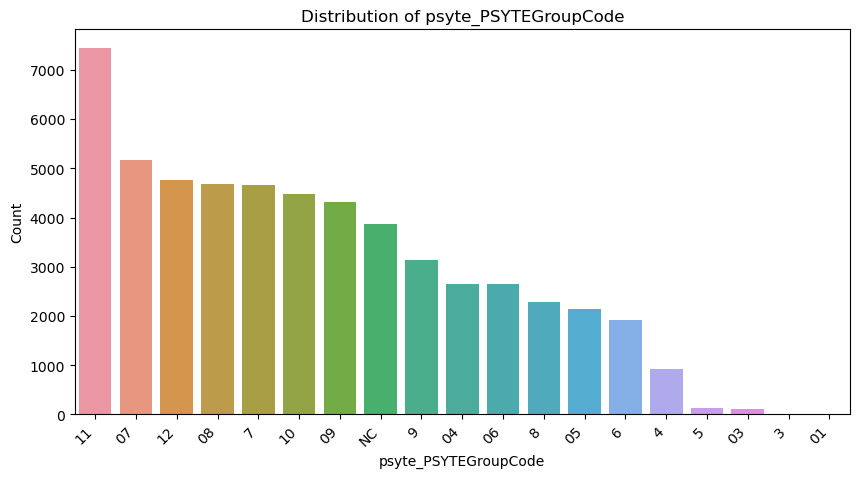

Column 'psyte_PSYTESegmentCode.description' has 46 unique values.


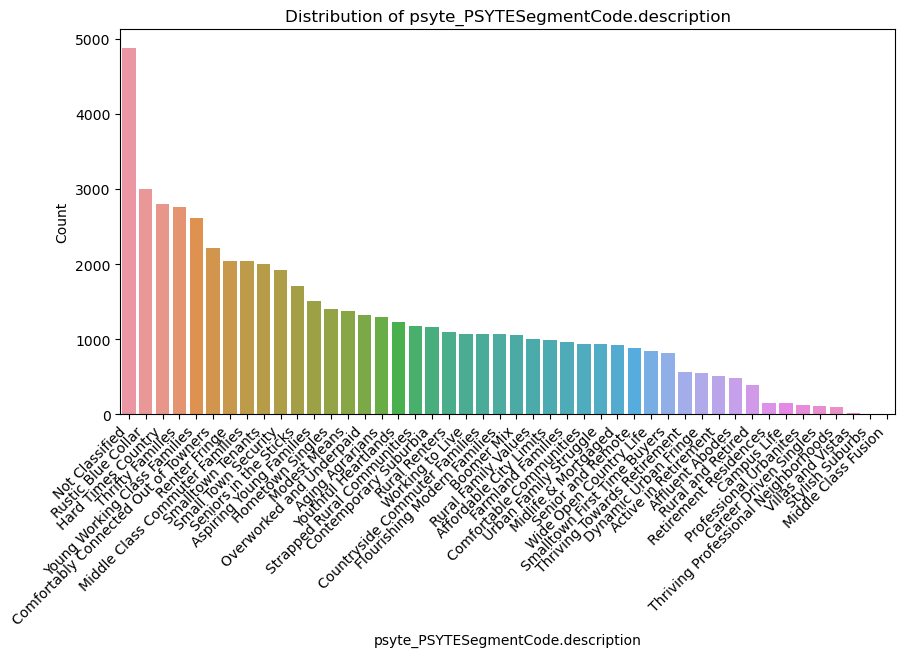

Column 'psyte_householdIncomeVariable.description' has 9 unique values.


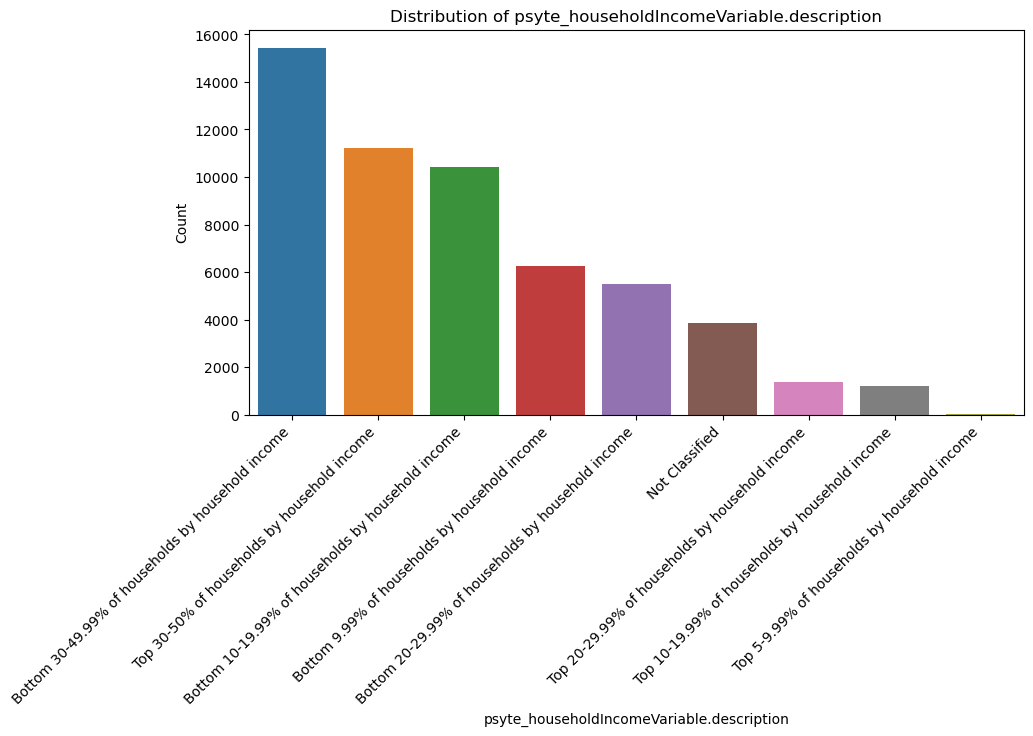

Column 'psyte_propertyValueVariable.description' has 10 unique values.


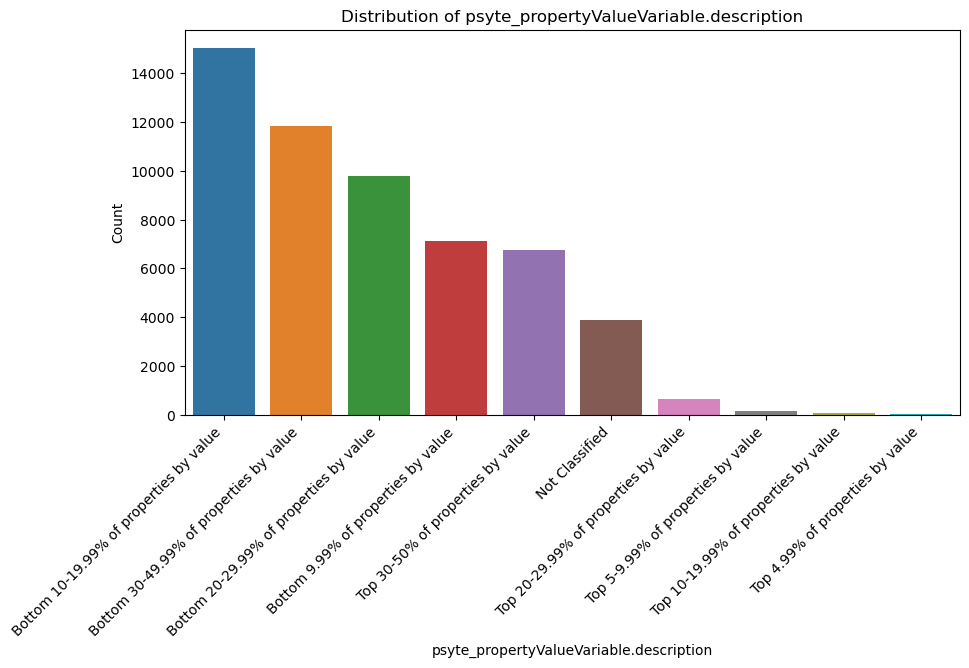

Column 'psyte_propertyTenureVariable.description' has 5 unique values.


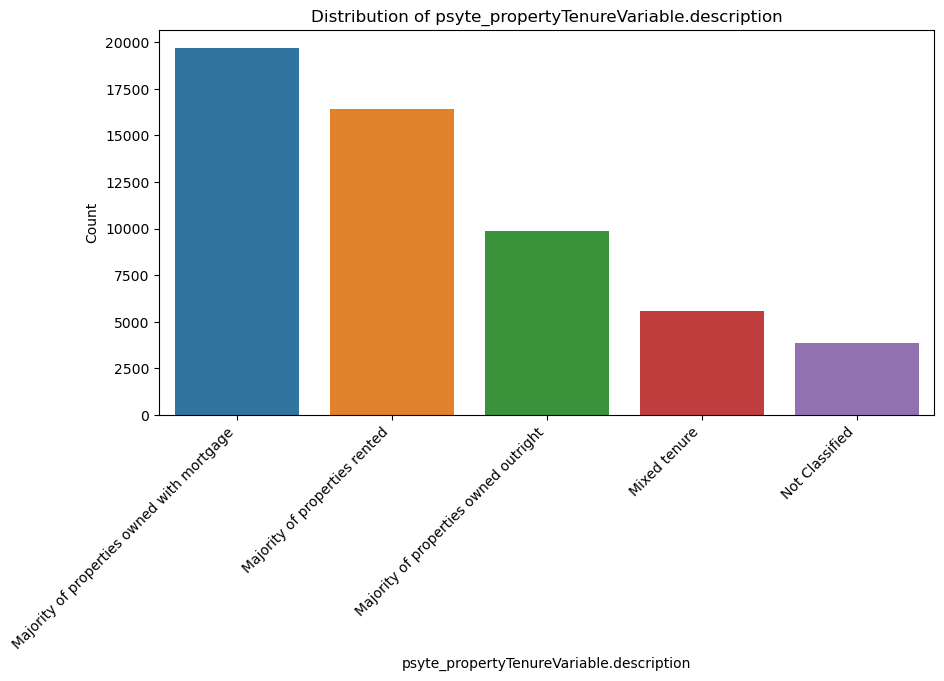

Column 'psyte_propertyTypeVariable.description' has 7 unique values.


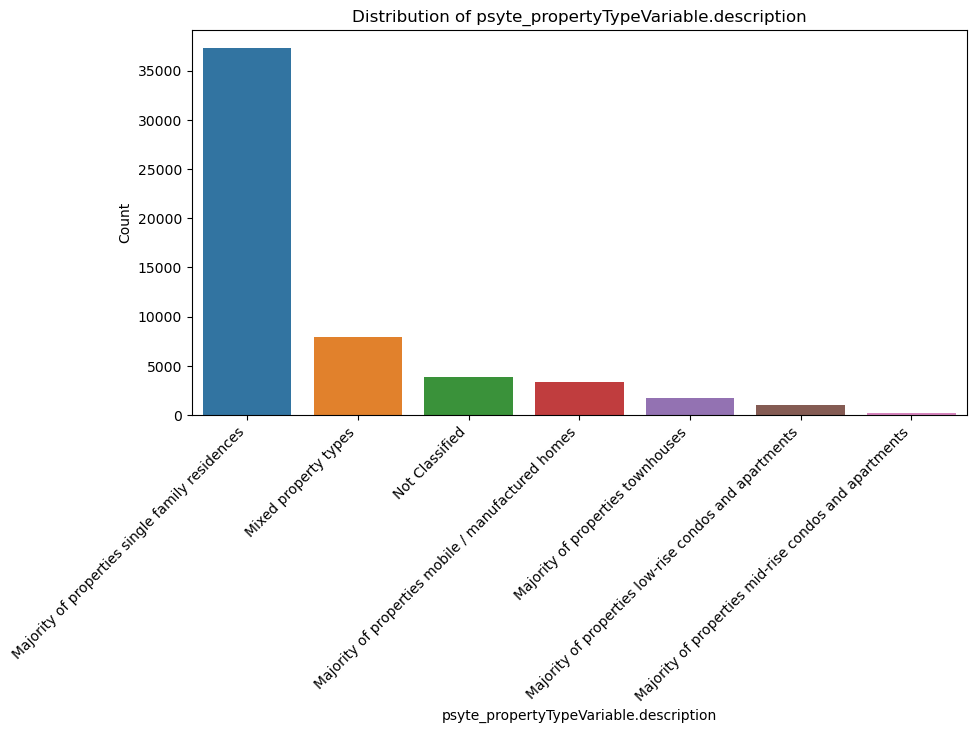

Column 'psyte_urbanRuralVariable.description' has 3 unique values.


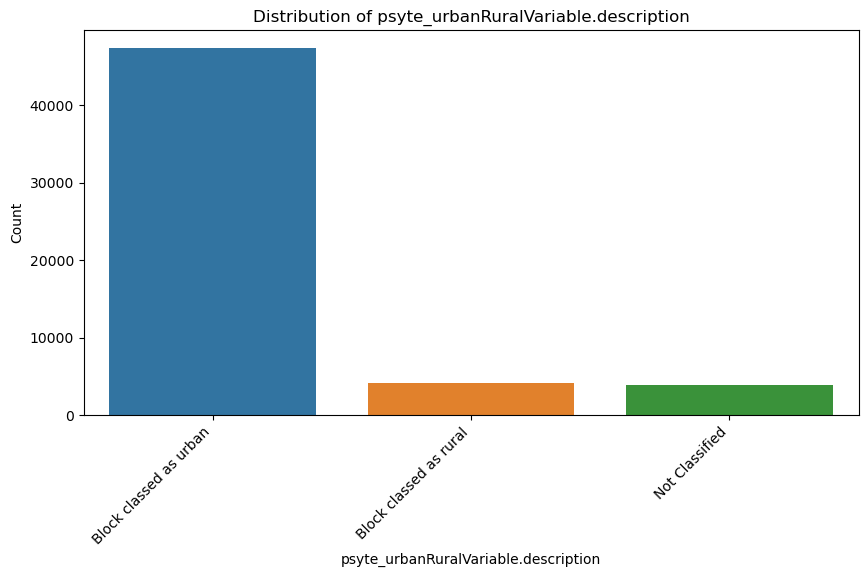

Column 'coastal_waterbodyName' has 6 unique values.


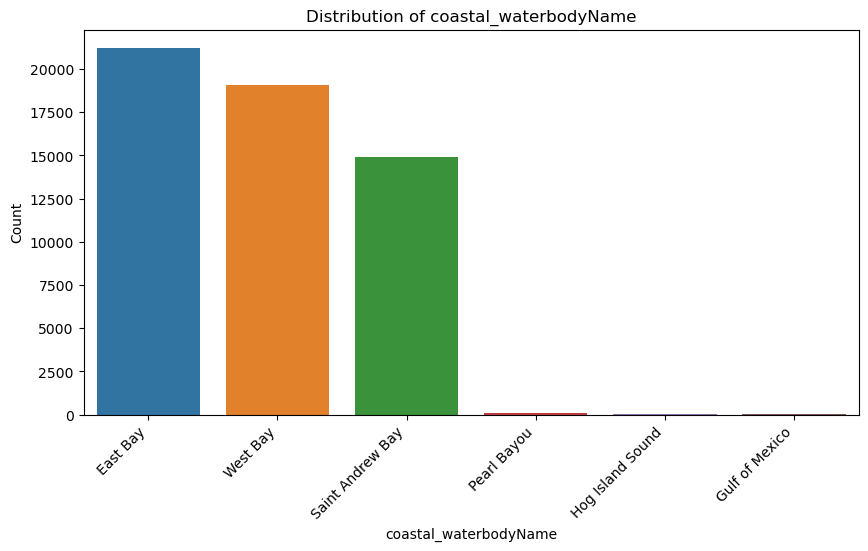

Column 'coastal_nearestWaterbodyAdjacentName' has 3 unique values.


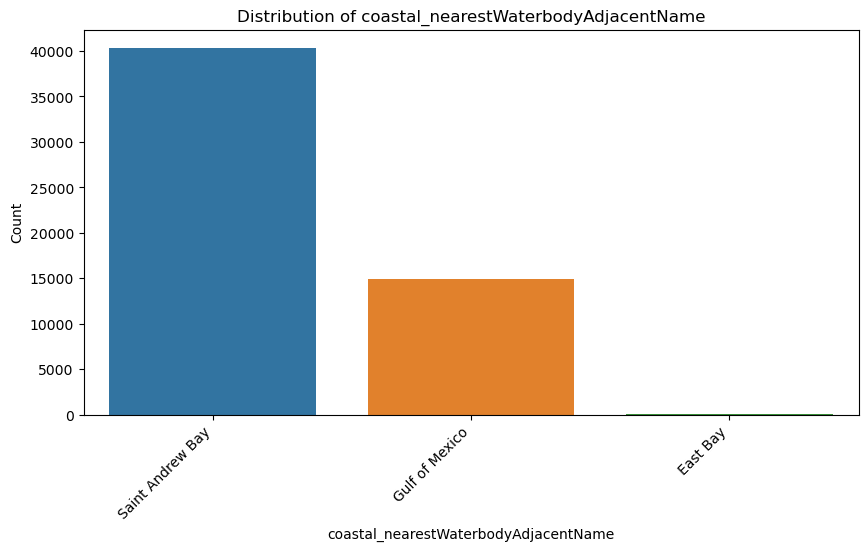

Column 'LOC_CODE' has 3 unique values.


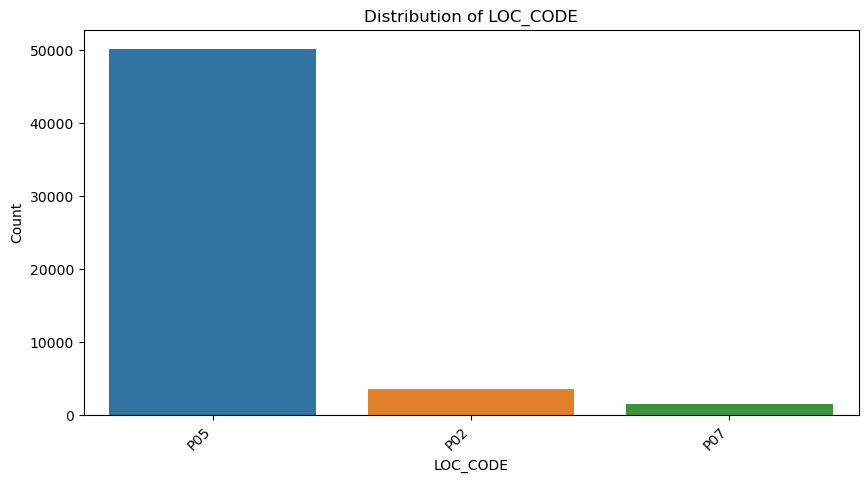

Column 'STREETNAME' has 1575 unique values.


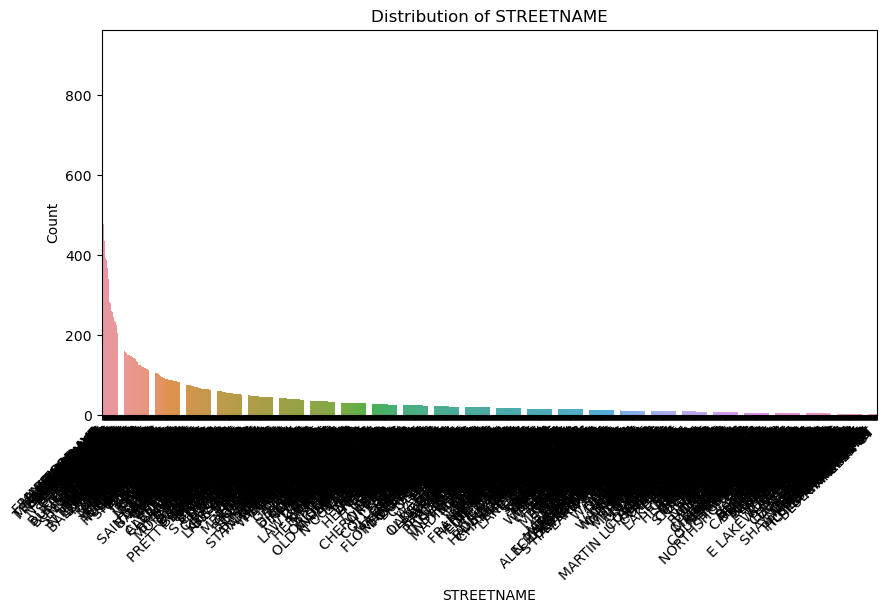

In [102]:
def plot_categorical_distributions(df):
    """
    This function identifies categorical columns in a DataFrame,
    prints the number of unique values, and plots histograms for each categorical column.
    """
    # Select categorical columns
    categorical_cols = ['psyte_PSYTEGroupCode', 'psyte_PSYTESegmentCode.description',
       'psyte_householdIncomeVariable.description',
       'psyte_propertyValueVariable.description',
       'psyte_propertyTenureVariable.description',
       'psyte_propertyTypeVariable.description',
       'psyte_urbanRuralVariable.description',
       'coastal_waterbodyName',
       'coastal_nearestWaterbodyAdjacentName', 'LOC_CODE'] # STREETNAME

    # Loop through each categorical column
    for col in categorical_cols:
        unique_values = df[col].nunique()
        print(f"Column '{col}' has {unique_values} unique values.")
        
        # Plot the frequency of unique values
        plt.figure(figsize=(10, 5))
        sns.countplot(data=df, x=col, order=df[col].value_counts().index)
        plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
        plt.title(f"Distribution of {col}")
        plt.ylabel('Count')
        plt.xlabel(col)
        plt.show()

plot_categorical_distributions(df)

In [101]:
numerical_df.columns

Index(['psyte_PSYTECategoryCode', 'psyte_censusBlock',
       'psyte_censusBlockGroup', 'psyte_censusBlockPopulation',
       'psyte_censusBlockHouseholds', 'coastal_nearestWaterbodyCounty',
       'coastal_nearestWaterbodyAdjacentType',
       'coastal_distanceToNearestCoastFeet',
       'coastal_nearestWaterbodyType.value', 'flood_floodID',
       'flood_stateFIPS', 'flood_communityNumber',
       'flood_addressLocationElevationFeet',
       'flood_year100FloodZoneDistanceFeet',
       'flood_year500FloodZoneDistanceFeet',
       'flood_distanceToNearestWaterbodyFeet', 'ZIPCODE', 'PLUS4', 'GEOID',
       'LAT', 'LON', 'FIPS', 'LivingSquareFootage', 'BedroomCount',
       'BathroomCount', 'SaleAmount', 'ParcelArea', 'Elevation',
       'MaxElevation', 'MinElevation', 'BuildingArea'],
      dtype='object')